In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_ori=pd.read_excel('HP SELLS DATA.xlsx')

In [4]:
df_ori.head()

,Edited Fiscal Quarter,Fiscal Quarter,Edited Fiscal month,Fiscal Month,START DAY FW,MONTH DAY FW,YEAR FW,Start Fiscal Week In Month,End Fiscal Week In Month,Fiscal Week In Month,...,Final Pipe Updated.1,Pipe Final Updaed,govt tagging,customer name,Final Pipe Updated East,Remarks East,Final Pipe Updated South,Final Pipe Updated Ent,Pipe Final Updaed Ent,North tagging.1
0,FY22 Q1,FY22 Q3,2022-01-01,2022-05-01,1,1,2022,1/1/2022,1/7/2022,2022-05-02 to 2022-05-08,...,Others PL,Others PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FY22 Q1,FY22 Q3,2022-01-01,2022-05-01,1,1,2022,1/1/2022,1/7/2022,2022-05-02 to 2022-05-08,...,Others PL,Others PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FY22 Q1,FY22 Q3,2022-01-01,2022-05-01,1,1,2022,1/1/2022,1/7/2022,2022-05-02 to 2022-05-08,...,Others PL,Others PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FY22 Q1,FY22 Q3,2022-01-01,2022-05-01,1,1,2022,1/1/2022,1/7/2022,2022-05-02 to 2022-05-08,...,Others PL,Others PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FY22 Q1,FY22 Q3,2022-01-01,2022-05-01,1,1,2022,1/1/2022,1/7/2022,2022-05-02 to 2022-05-08,...,Others PL,Others PL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_ori.columns

Index(['Edited Fiscal Quarter', 'Fiscal Quarter', 'Edited Fiscal month',
       'Fiscal Month', 'START DAY FW', 'MONTH DAY FW', 'YEAR FW',
       'Start Fiscal Week In Month', 'End Fiscal Week In Month',
       'Fiscal Week In Month',
       ...
       'Final Pipe Updated.1', 'Pipe Final Updaed', 'govt tagging',
       'customer name', 'Final Pipe Updated East', 'Remarks East',
       'Final Pipe Updated South', 'Final Pipe Updated Ent',
       'Pipe Final Updaed Ent', 'North tagging.1'],
      dtype='object', length=111)

In [6]:
columns=['Edited Fiscal Quarter',
          'Edited Fiscal month',
         'Start Fiscal Week In Month',
         'End Fiscal Week In Month',
          'Sellthru Units',
          'RAS Model',
          'City',
          'State',
          'ASP @ USD',
          'NDP @ USD',
          'ASP @ LC',
          'NDP @ LC',
          'Trans Date']
df_ts=df_ori[columns]
df_ts['total selling price']=df_ts['Sellthru Units']*df_ts['ASP @ USD']
df_ts['Start Fiscal Week In Month']=pd.to_datetime(df_ts['Start Fiscal Week In Month'])
df_ts['End Fiscal Week In Month']=pd.to_datetime(df_ts['End Fiscal Week In Month'])

df_ts.head()

,Edited Fiscal Quarter,Edited Fiscal month,Start Fiscal Week In Month,End Fiscal Week In Month,Sellthru Units,RAS Model,City,State,ASP @ USD,NDP @ USD,ASP @ LC,NDP @ LC,Trans Date,total selling price
0,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1,PRINTHEAD,KOCHI,KERALA,73.08,80.73,5583.26,6167.98,2022-05-05,73.08
1,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1,PRINTHEAD,MUMBAI,MAHARASHTRA,73.08,80.73,5583.26,6167.98,2022-05-06,73.08
2,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1,PRINTHEAD,MUMBAI,MAHARASHTRA,73.08,80.73,5583.26,6167.98,2022-05-06,73.08
3,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1,PRINTHEAD,KOCHI,KERALA,73.08,80.73,5583.26,6167.98,2022-05-05,73.08
4,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1,SUPPLIES,KOCHI,KERALA,92.54,102.23,7070.16,7810.60,2022-05-05,92.54


## distribution of ASP and unit sold

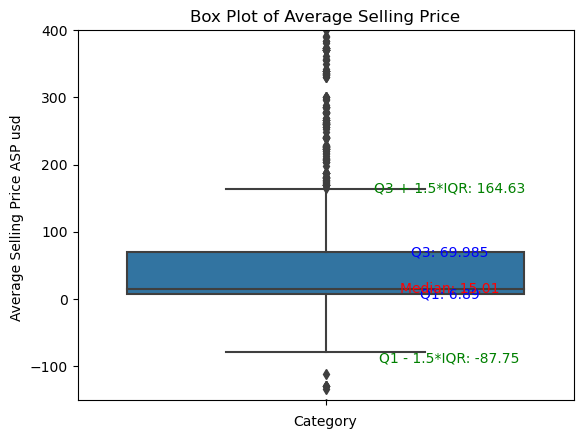

In [7]:
# box plot
sns.boxplot( y='ASP @ USD', data=df_ts)
plt.title('Box Plot of Average Selling Price')
plt.xlabel('Category')
plt.ylabel('Average Selling Price ASP usd ')
plt.ylim(-150,400)

q1 = df_ts['ASP @ USD'].quantile(0.25)
q2 = df_ts['ASP @ USD'].quantile(0.50)
q3 = df_ts['ASP @ USD'].quantile(0.75)
iqr = q3 - q1
plt.text(0.25, q1, f'Q1: {q1}', va='center', ha='center', color='blue')
plt.text(0.25, q2, f'Median: {q2}', va='center', ha='center', color='red')
plt.text(0.25, q3, f'Q3: {q3}', va='center', ha='center', color='blue')
plt.text(0.25, q1 - 1.5*iqr, f'Q1 - 1.5*IQR: {q1 - 1.5*iqr:.2f}', va='center', ha='center', color='green')
plt.text(0.25, q3 + 1.5*iqr, f'Q3 + 1.5*IQR: {q3 + 1.5*iqr:.2f}', va='center', ha='center', color='green')

plt.show()

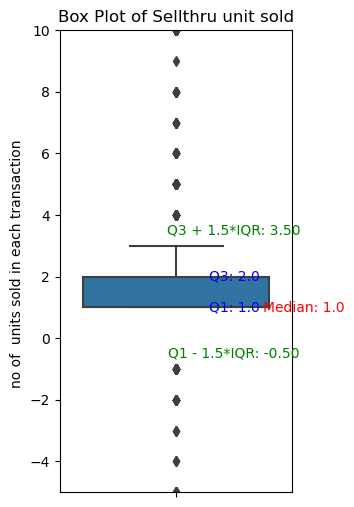

median values of sellthru unit  1.0


In [8]:
plt.figure(figsize=(3,6))
sns.boxplot( y='Sellthru Units', data=df_ts)
plt.title('Box Plot of Sellthru unit sold')
# plt.xlabel('')
plt.ylabel('no of  units sold in each transaction ')
plt.ylim(-5,10)

q1 = df_ts['Sellthru Units'].quantile(0.25)
q2 = df_ts['Sellthru Units'].quantile(0.50)
q3 = df_ts['Sellthru Units'].quantile(0.75)
iqr = q3 - q1
plt.text(0.25, q1, f'Q1: {q1}', va='center', ha='center', color='blue')
plt.text(0.55, q2, f'Median: {q2}', va='center', ha='center', color='red')
plt.text(0.25, q3, f'Q3: {q3}', va='center', ha='center', color='blue')
plt.text(0.25, q1 - 1.5*iqr, f'Q1 - 1.5*IQR: {q1 - 1.5*iqr:.2f}', va='center', ha='center', color='green')
plt.text(.25, q3 + 1.5*iqr, f'Q3 + 1.5*IQR: {q3 + 1.5*iqr:.2f}', va='center', ha='center', color='green')

plt.show()
print('median values of sellthru unit ',q2)

(0.0, 700.0)

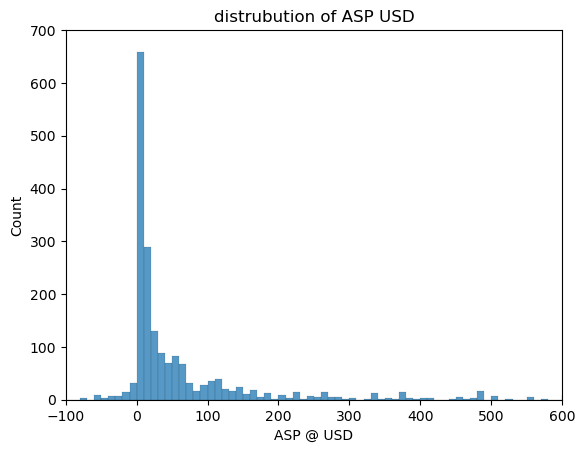

In [9]:
sns.histplot(data=df_ts,x="ASP @ USD")
plt.title('distrubution of ASP USD')

# Change the range of the x-axis and y-axis
plt.xlim(-100, 600)  # Set the range of the x-axis from 0 to 6
plt.ylim(0, 700) 

(0.0, 200.0)

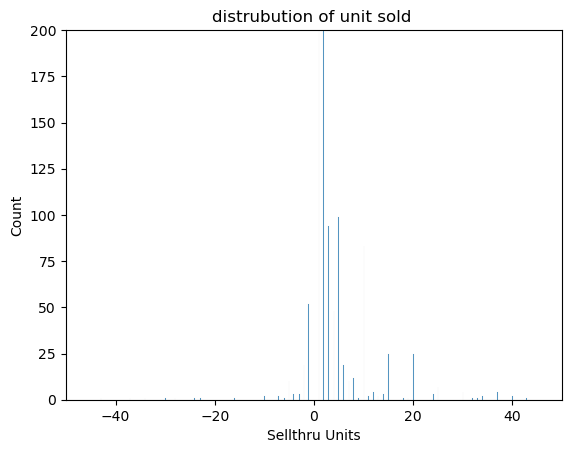

In [10]:
sns.histplot(data=df_ts,x="Sellthru Units")
plt.title('distrubution of unit sold ')

# Change the range of the x-axis and y-axis
plt.xlim(-50, 50)  # Set the range of the x-axis from 0 to 6
plt.ylim(0, 200) 

### visualization of total sale and total unit sold in each week (year/month/startFWeek)


In [11]:
df_perEachWeek=df_ts.groupby(['Start Fiscal Week In Month'])[['Sellthru Units','ASP @ USD']].sum().reset_index()
df_perEachWeek.head()

,Start Fiscal Week In Month,Sellthru Units,ASP @ USD
0,2022-01-01,109,5929.75
1,2022-01-08,157,12060.88
2,2022-01-15,369,19197.43
3,2022-01-22,645,30868.99
4,2022-02-01,150,19006.24


defining ploting funtion

In [12]:
def plotline(dataframe,xaxis,xstr,yaxis,ystr):
    plt.figure(figsize=(20, 2))
    sns.lineplot(data=dataframe, x=xaxis, y=yaxis)
    sns.set(style="whitegrid")
    plt.title(f' {ystr} ')
    plt.xlabel(f'{xstr}')
    plt.ylabel(f' {ystr}')
    plt.xticks(rotation=45)
    plt.show()

### viusalization of total unit sold and total sale in each fiscal week of a month

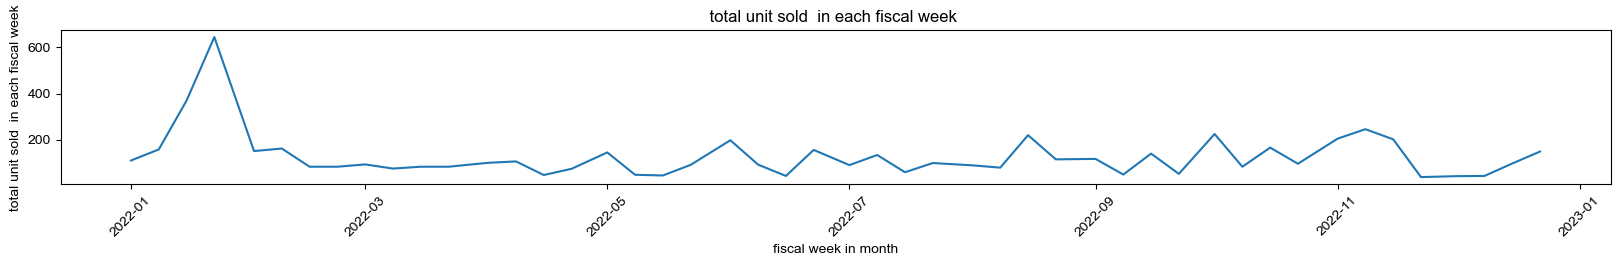

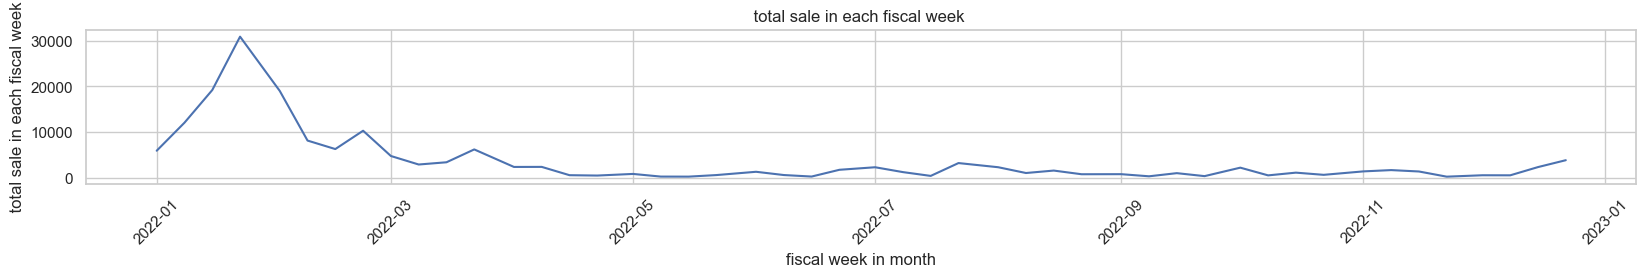

In [13]:
plotline(dataframe=df_perEachWeek,xaxis='Start Fiscal Week In Month',xstr='fiscal week in month',yaxis='Sellthru Units',ystr='total unit sold  in each fiscal week ')
plotline(dataframe=df_perEachWeek,xaxis='Start Fiscal Week In Month',xstr='fiscal week in month',yaxis='ASP @ USD',ystr='total sale in each fiscal week ')    

### scattered plot of total sale and total unit sold IN EACH FISCAL WEEK

In [14]:
def scatterplot(dataframe,xaxis,xstr,yaxis,ystr):
    plt.figure(figsize=(20, 2))
    sns.scatterplot(data=dataframe, x=xaxis, y=yaxis)
    sns.set(style="whitegrid")
    plt.title(f' {ystr} ')
    plt.xlabel(f'{xstr}')
    plt.ylabel(f' {ystr}')
    plt.xticks(rotation=45)
    plt.show()

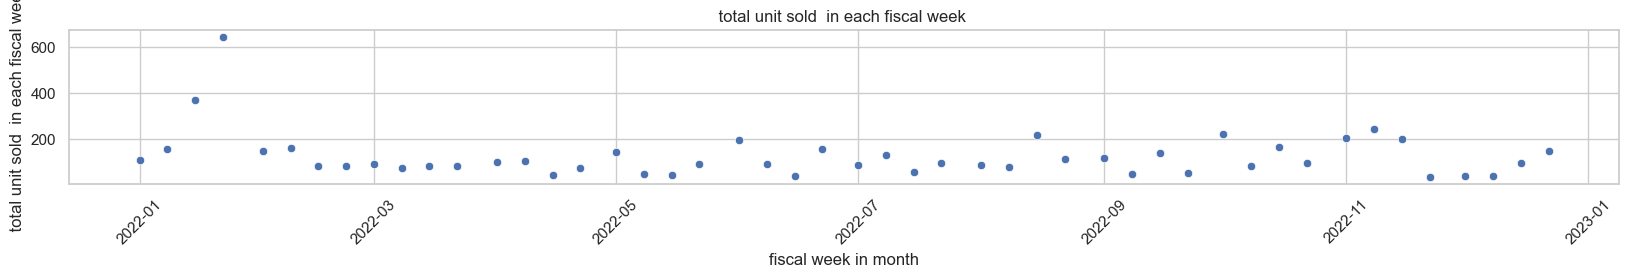

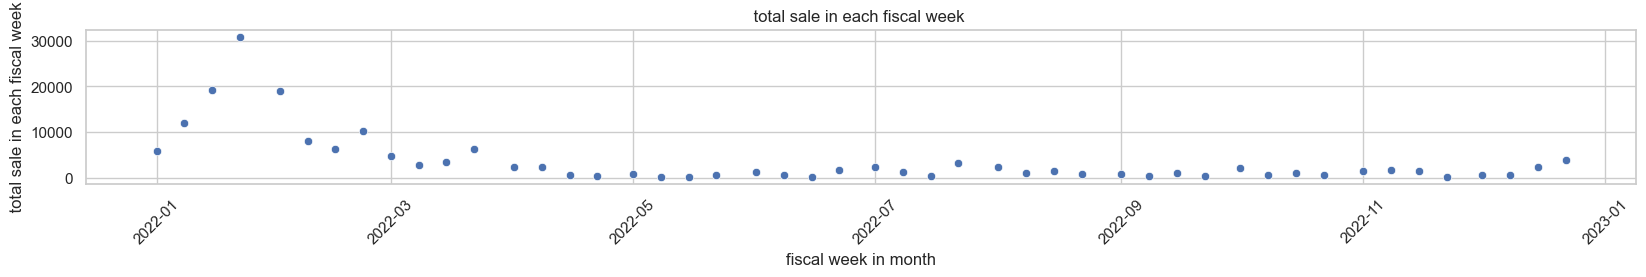

In [15]:
scatterplot(dataframe=df_perEachWeek,xaxis='Start Fiscal Week In Month',xstr='fiscal week in month',yaxis='Sellthru Units',ystr='total unit sold  in each fiscal week ')
scatterplot(dataframe=df_perEachWeek,xaxis='Start Fiscal Week In Month',xstr='fiscal week in month',yaxis='ASP @ USD',ystr='total sale in each fiscal week ')   

### total sale and unit sold in each fiscal week of month in each specific state

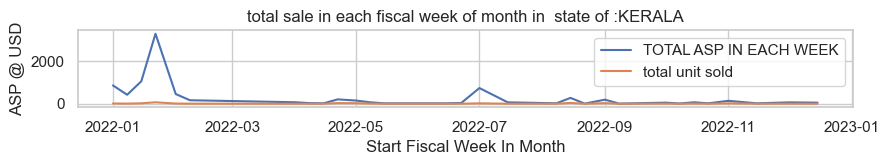

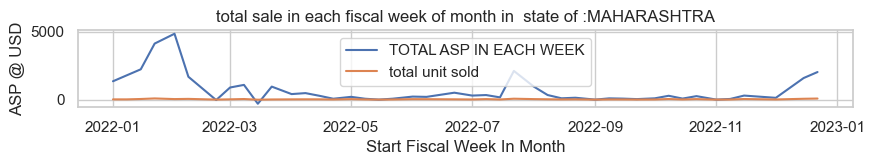

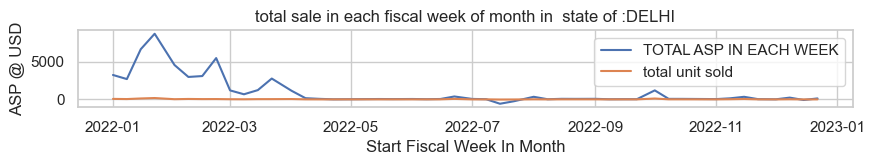

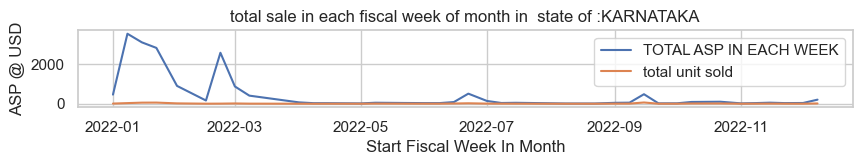

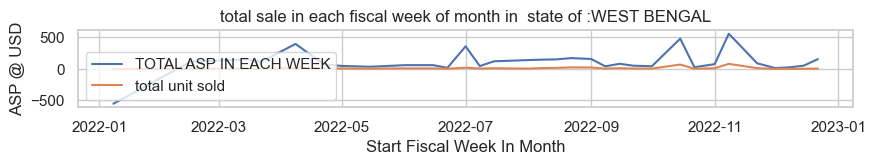

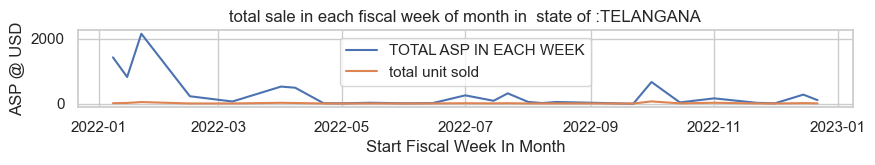

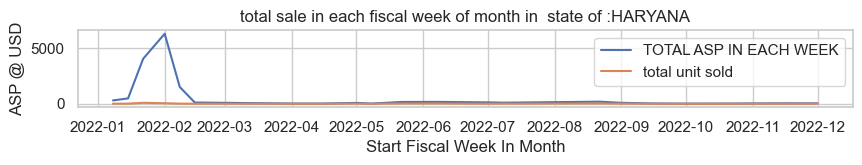

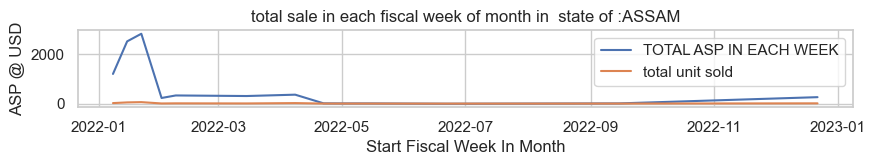

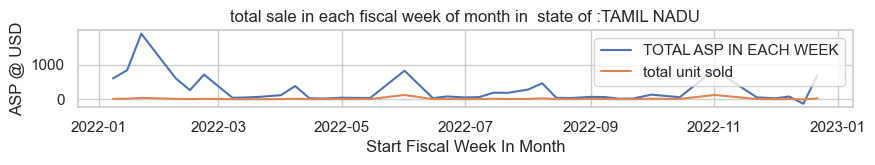

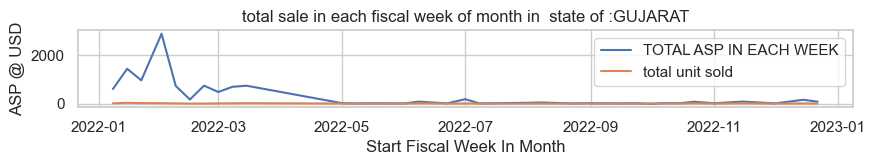

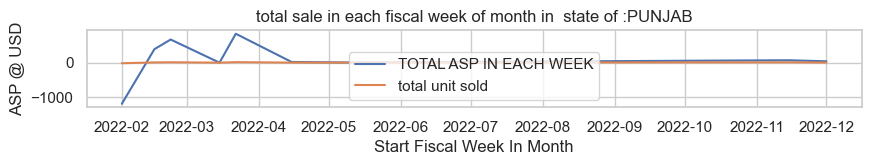

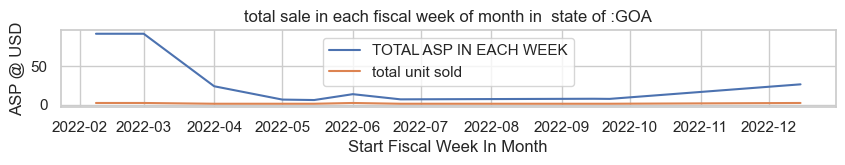

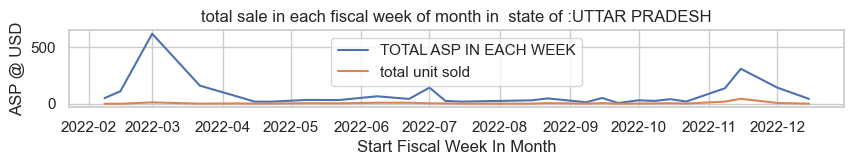

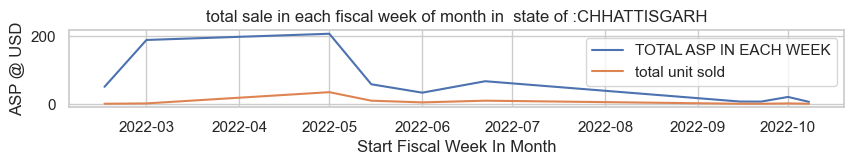

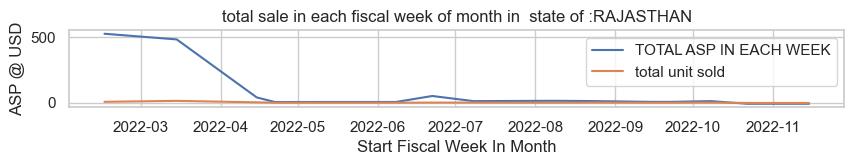

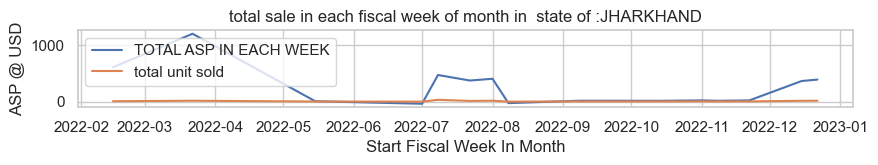

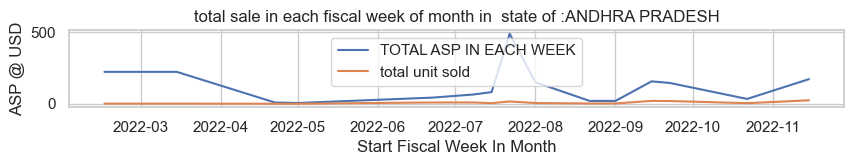

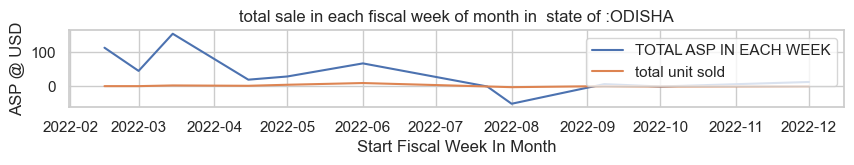

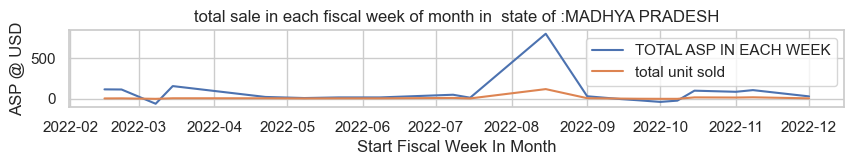

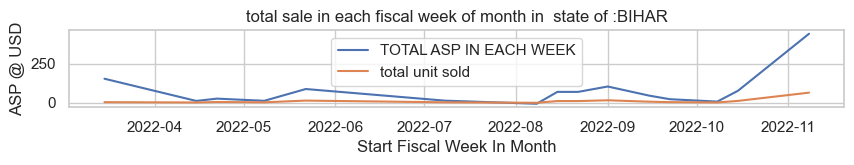

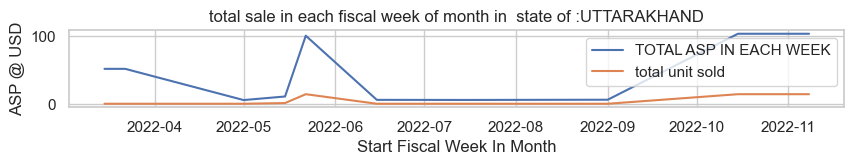

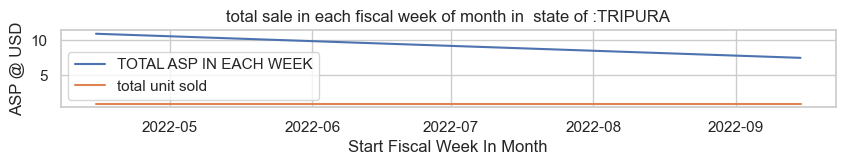

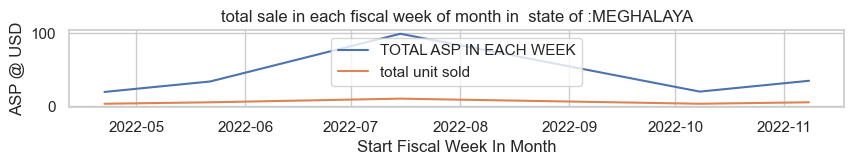

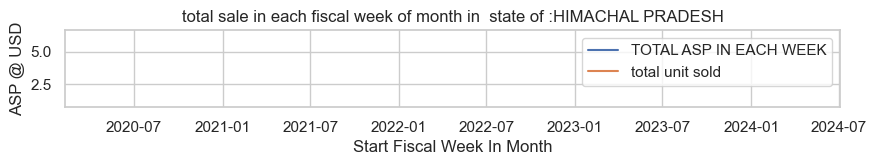

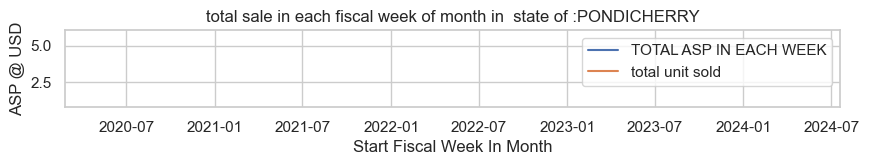

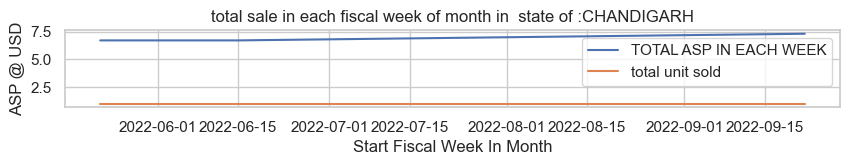

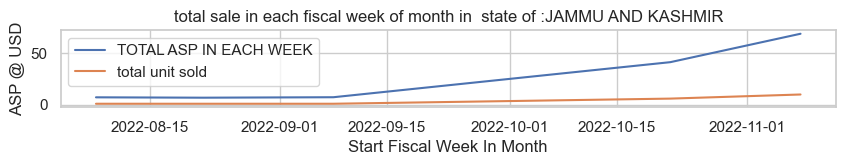

In [15]:
for state in df_ts['State'].unique():
    # print(category)
    df_temp_fRasM=df_ts[df_ts['State']==state].groupby(['Start Fiscal Week In Month'])[['Sellthru Units','ASP @ USD']].sum().reset_index()
    
    plt.figure(figsize=(10,1))
    sns.lineplot(data=df_temp_fRasM,x='Start Fiscal Week In Month',y='ASP @ USD',label='TOTAL ASP IN EACH WEEK')
    sns.lineplot(data=df_temp_fRasM,x='Start Fiscal Week In Month',y='Sellthru Units',label='total unit sold')
    plt.legend()
    plt.title(f'total sale in each fiscal week of month in  state of :{state}')
    plt.show()
    time.sleep(0.1)
    

## filtering out the noice data from ASP @ USD AND NO OF UNIT SOLD(Sellthru Units)

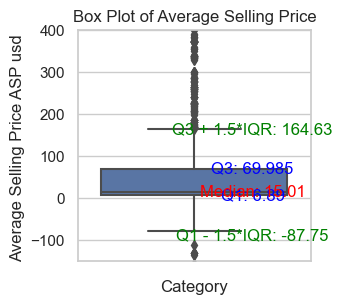

median values 15.01


In [16]:
# box plot
plt.figure(figsize=(3,3))
sns.boxplot( y='ASP @ USD', data=df_ts)
plt.title('Box Plot of Average Selling Price')
plt.xlabel('Category')
plt.ylabel('Average Selling Price ASP usd ')
plt.ylim(-150,400)

q1 = df_ts['ASP @ USD'].quantile(0.25)
q2 = df_ts['ASP @ USD'].quantile(0.50)
q3 = df_ts['ASP @ USD'].quantile(0.75)
iqr = q3 - q1
plt.text(0.25, q1, f'Q1: {q1}', va='center', ha='center', color='blue')
plt.text(0.25, q2, f'Median: {q2}', va='center', ha='center', color='red')
plt.text(0.25, q3, f'Q3: {q3}', va='center', ha='center', color='blue')
plt.text(0.25, q1 - 1.5*iqr, f'Q1 - 1.5*IQR: {q1 - 1.5*iqr:.2f}', va='center', ha='center', color='green')
plt.text(0.25, q3 + 1.5*iqr, f'Q3 + 1.5*IQR: {q3 + 1.5*iqr:.2f}', va='center', ha='center', color='green')

plt.show()
print('median values',q2)

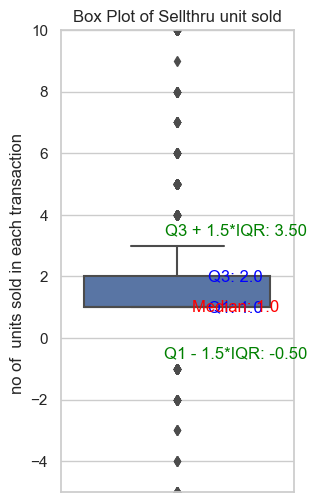

median values of sellthru unit  1.0


In [117]:
plt.figure(figsize=(3,6))
sns.boxplot( y='Sellthru Units', data=df_ts)
plt.title('Box Plot of Sellthru unit sold')
# plt.xlabel('')
plt.ylabel('no of  units sold in each transaction ')
plt.ylim(-5,10)

q1 = df_ts['Sellthru Units'].quantile(0.25)
q2 = df_ts['Sellthru Units'].quantile(0.50)
q3 = df_ts['Sellthru Units'].quantile(0.75)
iqr = q3 - q1
plt.text(0.25, q1, f'Q1: {q1}', va='center', ha='center', color='blue')
plt.text(0.25, q2, f'Median: {q2}', va='center', ha='center', color='red')
plt.text(0.25, q3, f'Q3: {q3}', va='center', ha='center', color='blue')
plt.text(0.25, q1 - 1.5*iqr, f'Q1 - 1.5*IQR: {q1 - 1.5*iqr:.2f}', va='center', ha='center', color='green')
plt.text(0.25, q3 + 1.5*iqr, f'Q3 + 1.5*IQR: {q3 + 1.5*iqr:.2f}', va='center', ha='center', color='green')

plt.show()
print('median values of sellthru unit ',q2)

In [23]:
#median value of ASP USD
# median value of Sellthru Units
med_asp=15.1
med_sellthru=1.0

filtered_df_ts=df_ts.copy(deep=True)
filtered_df_ts['ASP @ USD'] = np.where(((filtered_df_ts['ASP @ USD'] >164.63 )| (filtered_df_ts['ASP @ USD']<=-87.75)), med_asp, filtered_df_ts['ASP @ USD'])
filtered_df_ts['Sellthru Units'] = np.where(((filtered_df_ts['Sellthru Units'] >3.50 ) | (filtered_df_ts['Sellthru Units']<=-0.50 )), med_sellthru, filtered_df_ts['Sellthru Units'])


In [24]:
filtered_df_ts.head()

,Edited Fiscal Quarter,Edited Fiscal month,Start Fiscal Week In Month,End Fiscal Week In Month,Sellthru Units,RAS Model,City,State,ASP @ USD,NDP @ USD,ASP @ LC,NDP @ LC,Trans Date,total selling price
0,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1.0,PRINTHEAD,KOCHI,KERALA,73.08,80.73,5583.26,6167.98,2022-05-05,73.08
1,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1.0,PRINTHEAD,MUMBAI,MAHARASHTRA,73.08,80.73,5583.26,6167.98,2022-05-06,73.08
2,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1.0,PRINTHEAD,MUMBAI,MAHARASHTRA,73.08,80.73,5583.26,6167.98,2022-05-06,73.08
3,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1.0,PRINTHEAD,KOCHI,KERALA,73.08,80.73,5583.26,6167.98,2022-05-05,73.08
4,FY22 Q1,2022-01-01,2022-01-01,2022-01-07,1.0,SUPPLIES,KOCHI,KERALA,92.54,102.23,7070.16,7810.60,2022-05-05,92.54


### visualization of ASP USD AND TOTAL UNIT SOLD in each fiscal week after smoothing the column value by median of corresponding columns values

In [25]:
filtered_df_perEachWeek=filtered_df_ts.groupby(['Start Fiscal Week In Month'])[['Sellthru Units','ASP @ USD']].sum().reset_index()
filtered_df_perEachWeek.head()   ## grouping by fiscal weeks

,Start Fiscal Week In Month,Sellthru Units,ASP @ USD
0,2022-01-01,55.0,2724.09
1,2022-01-08,57.0,1460.47
2,2022-01-15,51.0,1559.43
3,2022-01-22,48.0,1087.09
4,2022-02-01,62.0,619.10


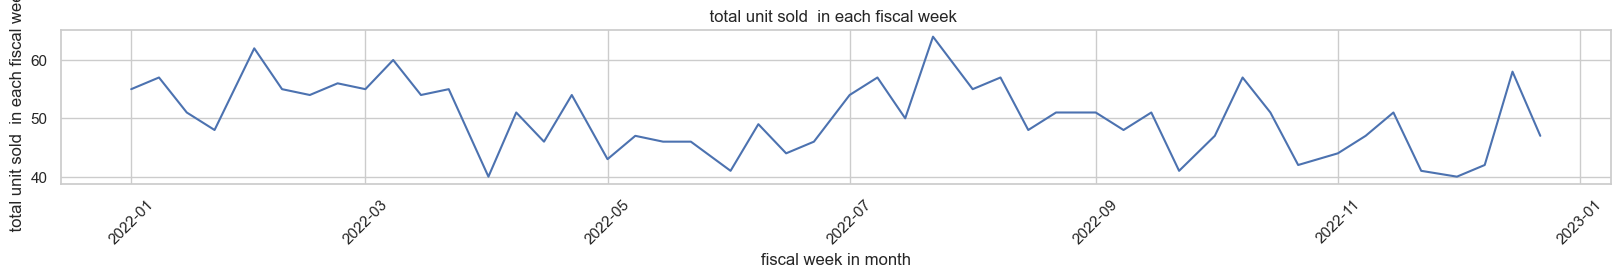

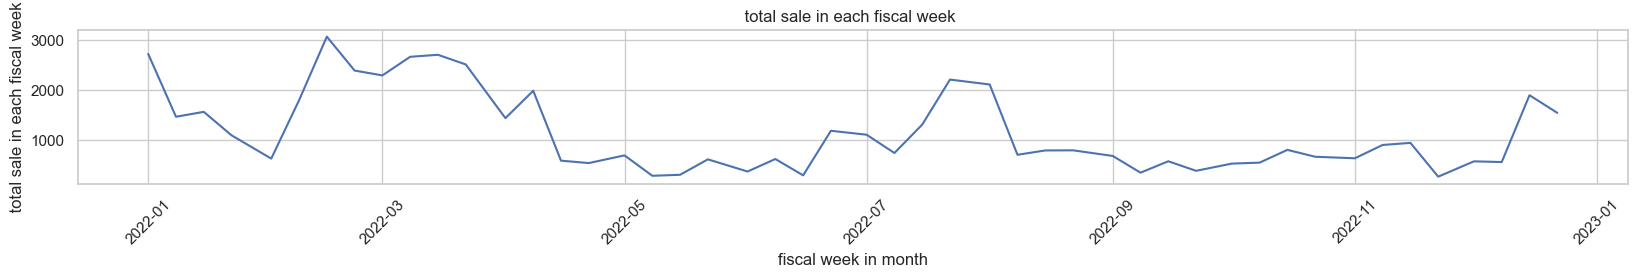

In [26]:
plotline(dataframe=filtered_df_perEachWeek,xaxis='Start Fiscal Week In Month',xstr='fiscal week in month',yaxis='Sellthru Units',ystr='total unit sold  in each fiscal week ')
plotline(dataframe=filtered_df_perEachWeek,xaxis='Start Fiscal Week In Month',xstr='fiscal week in month',yaxis='ASP @ USD',ystr='total sale in each fiscal week ')    

### after smoothing by median and filterd by state 

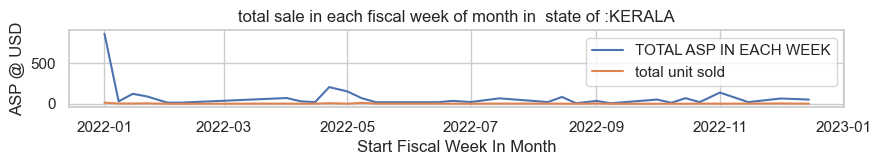

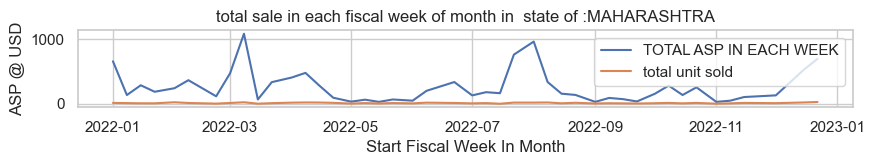

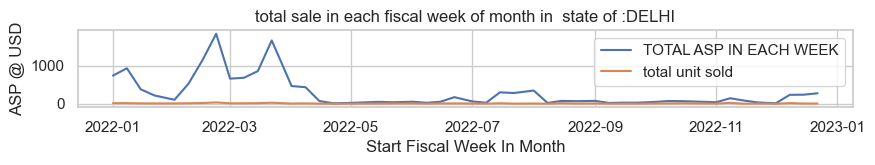

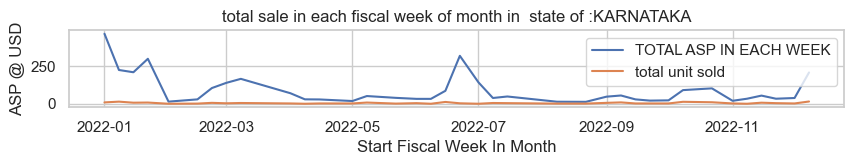

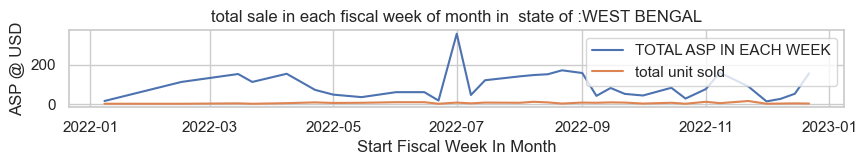

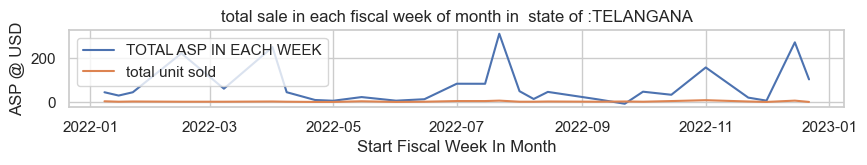

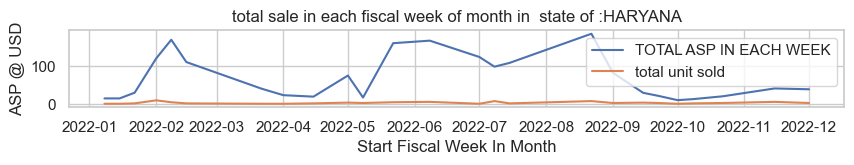

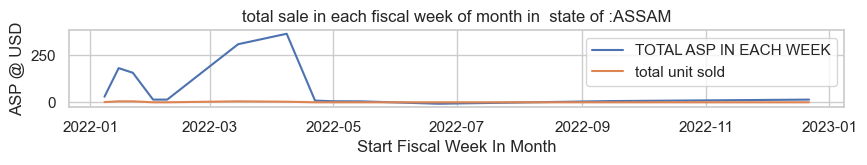

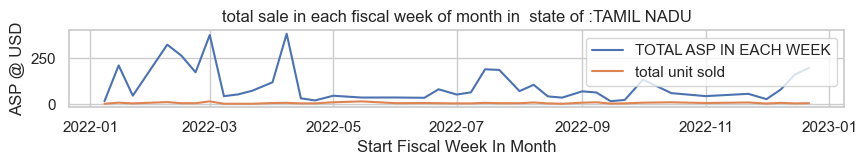

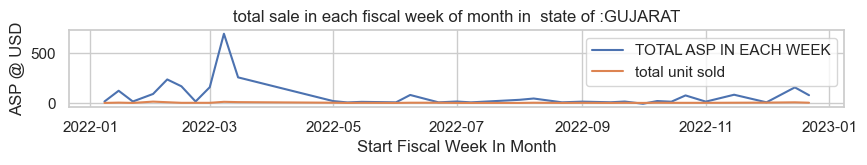

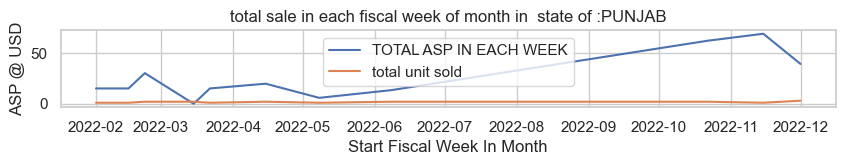

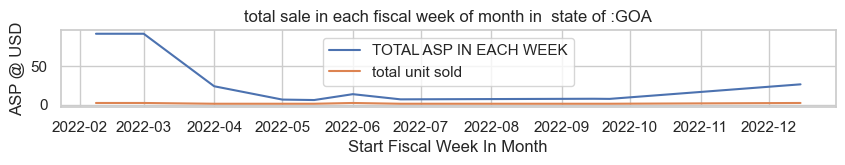

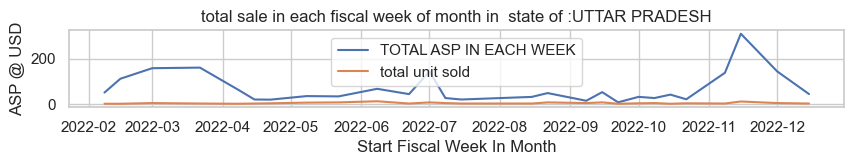

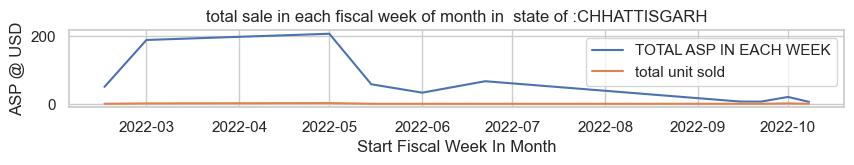

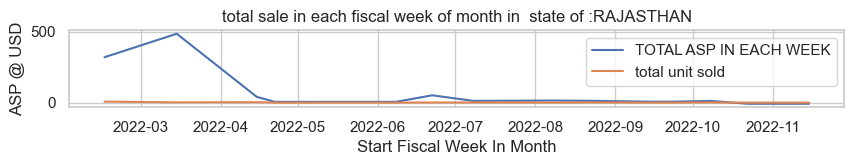

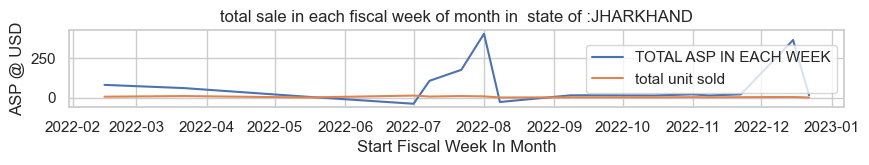

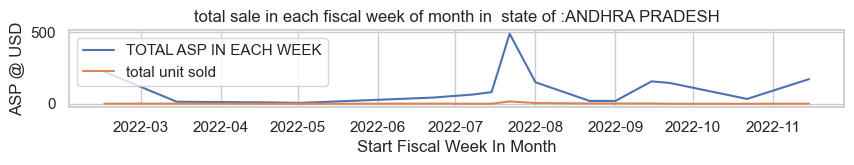

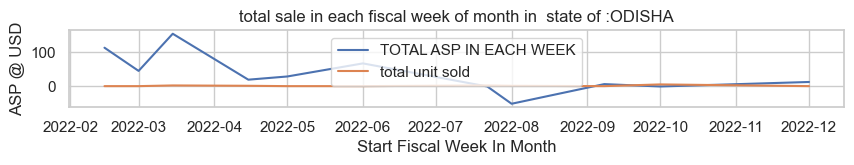

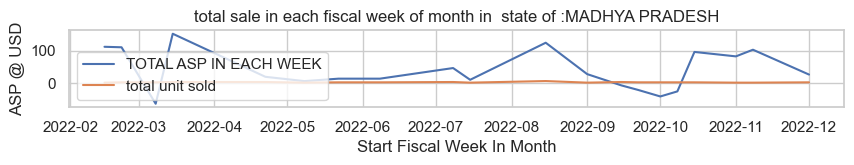

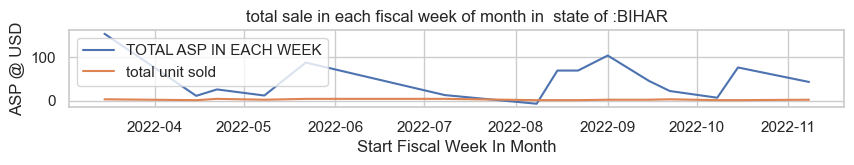

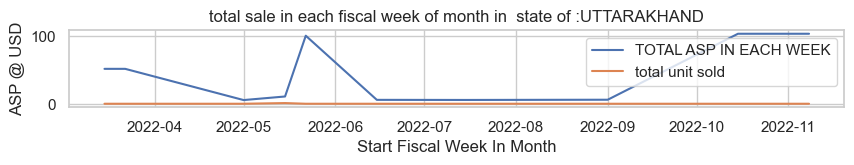

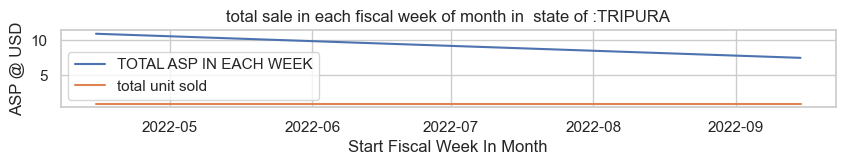

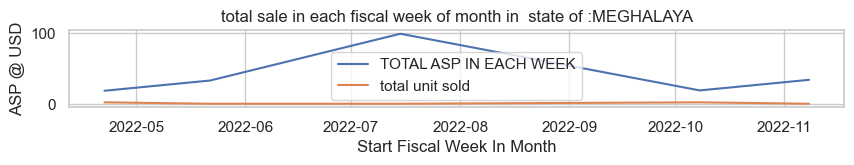

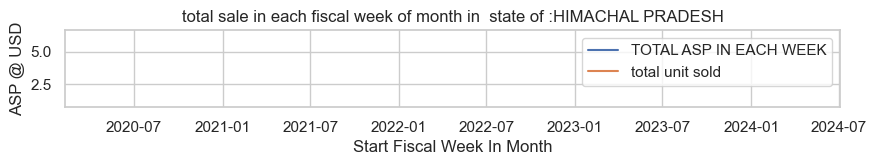

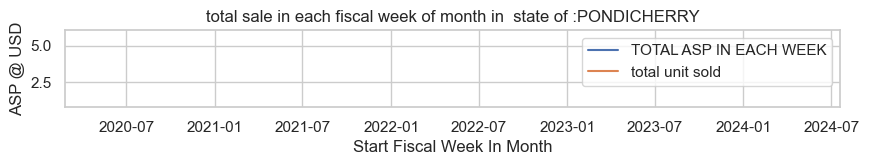

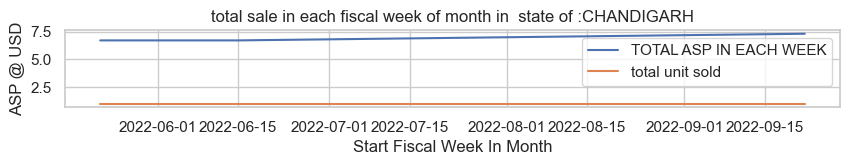

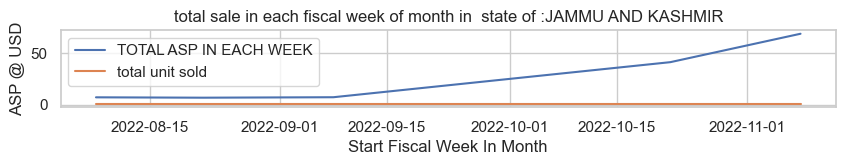

In [20]:
for state in filtered_df_ts['State'].unique():
    # print(category)
    df_temp_fRasM=filtered_df_ts[df_ts['State']==state].groupby(['Start Fiscal Week In Month'])[['Sellthru Units','ASP @ USD']].sum().reset_index()
    
    plt.figure(figsize=(10,1))
    sns.lineplot(data=df_temp_fRasM,x='Start Fiscal Week In Month',y='ASP @ USD',label='TOTAL ASP IN EACH WEEK')
    sns.lineplot(data=df_temp_fRasM,x='Start Fiscal Week In Month',y='Sellthru Units',label='total unit sold')
    plt.legend()
    plt.title(f'total sale in each fiscal week of month in  state of :{state}')
    plt.show()
    time.sleep(0.1)
    

### visualization of ASP USD AND TOTAL UNIT SOLD in each fiscal week after smoothing the column value by mean() of corresponding columns values

In [21]:
med_asp=df_ts['ASP @ USD'].mean()

med_sellthru=df_ts['Sellthru Units'].mean()

filtered_df_ts=df_ts.copy(deep=True)
filtered_df_ts['ASP @ USD'] = np.where(((filtered_df_ts['ASP @ USD'] >164.63 )| (filtered_df_ts['ASP @ USD']<=-87.75)), med_asp, filtered_df_ts['ASP @ USD'])
filtered_df_ts['Sellthru Units'] = np.where(((filtered_df_ts['Sellthru Units'] >3.50 ) | (filtered_df_ts['Sellthru Units']<=-0.50 )), med_sellthru, filtered_df_ts['Sellthru Units'])
filtered_df_perEachWeek=filtered_df_ts.groupby(['Start Fiscal Week In Month'])[['Sellthru Units','ASP @ USD']].sum().reset_index()
# filtered_df_perEachWeek.head()

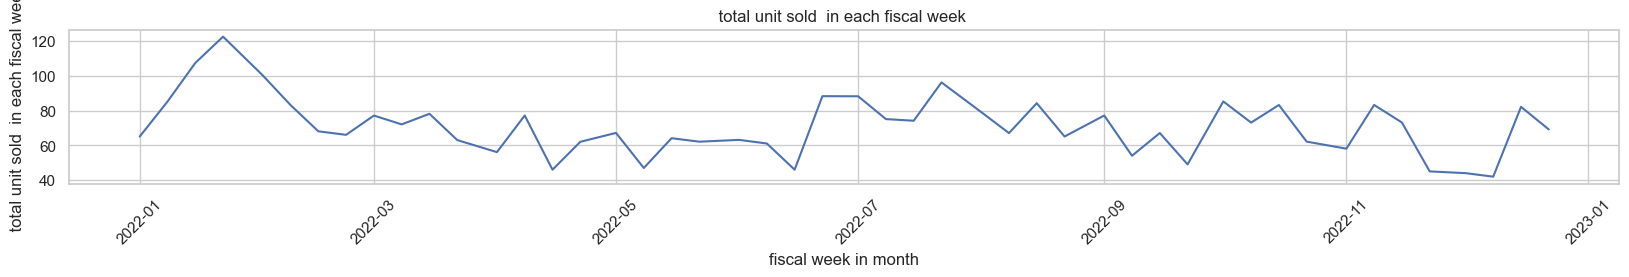

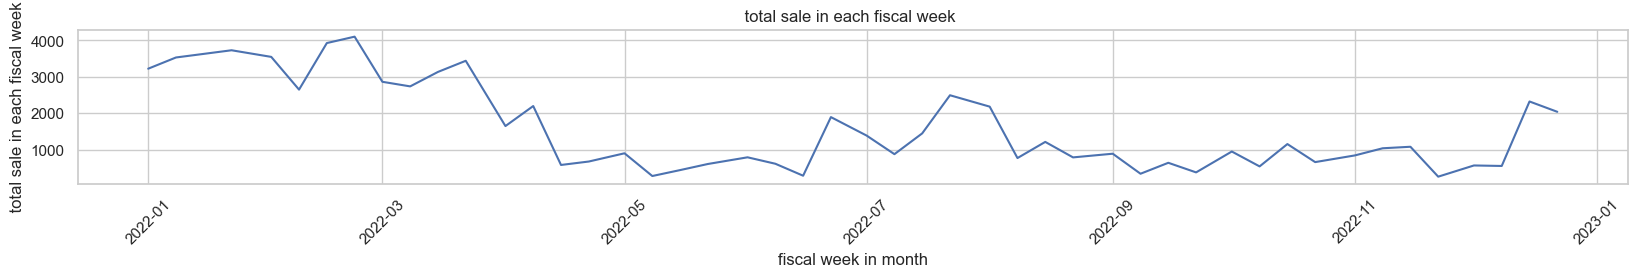

In [22]:
plotline(dataframe=filtered_df_perEachWeek,xaxis='Start Fiscal Week In Month',xstr='fiscal week in month',yaxis='Sellthru Units',ystr='total unit sold  in each fiscal week ')
plotline(dataframe=filtered_df_perEachWeek,xaxis='Start Fiscal Week In Month',xstr='fiscal week in month',yaxis='ASP @ USD',ystr='total sale in each fiscal week ')    

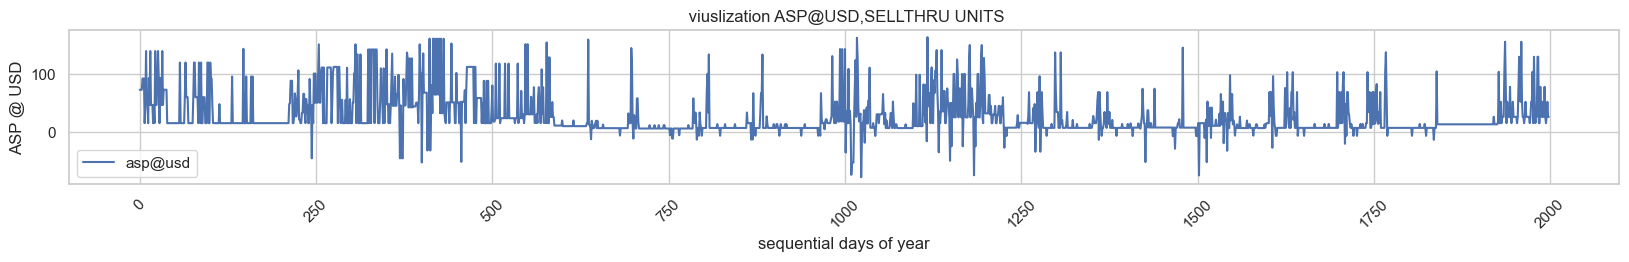

In [27]:

plt.figure(figsize=(20, 2))
sns.lineplot(data=filtered_df_ts, x=np.arange(len(filtered_df_ts)), y='ASP @ USD' , label='asp@usd')
# sns.lineplot(data=filtered_df_ts, x=np.arange(len(filtered_df_ts)), y='Sellthru Units',label='Sellthru Units')

sns.set(style="whitegrid")
plt.title(f' viuslization ASP@USD,SELLTHRU UNITS')
plt.xlabel('sequential days of year')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [26]:
filtered_df_perEachWeek

,Start Fiscal Week In Month,Sellthru Units,ASP @ USD
0,2022-01-01,65.080040,3224.315113
1,2022-01-08,85.224112,3532.831181
2,2022-01-15,107.448224,3631.791181
3,2022-01-22,122.592296,3731.137024
4,2022-02-01,100.304152,3548.989945
5,2022-02-08,83.224112,2648.988764
6,2022-02-15,68.112056,3929.018764
7,2022-02-22,66.080040,4105.057529
8,2022-03-01,77.176088,2863.995843
9,2022-03-08,72.096048,2738.040730


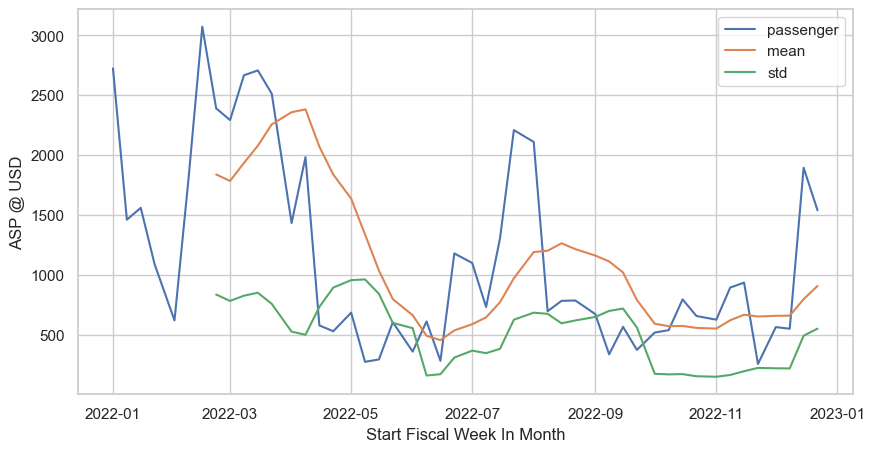

In [28]:
filtered_df_perEachWeek['rollmean']=filtered_df_perEachWeek['ASP @ USD'].rolling(window=8).mean()
filtered_df_perEachWeek['rollstd']=filtered_df_perEachWeek['ASP @ USD'].rolling(window=8).std()
plt.figure(figsize=(10,5))
sns.lineplot(data=filtered_df_perEachWeek, x=filtered_df_perEachWeek['Start Fiscal Week In Month'], y=filtered_df_perEachWeek['ASP @ USD'], label='passenger')
sns.lineplot(data=filtered_df_perEachWeek, x=filtered_df_perEachWeek['Start Fiscal Week In Month'], y=filtered_df_perEachWeek.rollmean, label='mean')
sns.lineplot(data=filtered_df_perEachWeek, x=filtered_df_perEachWeek['Start Fiscal Week In Month'], y=filtered_df_perEachWeek.rollstd, label='std')
plt.legend()
plt.show()

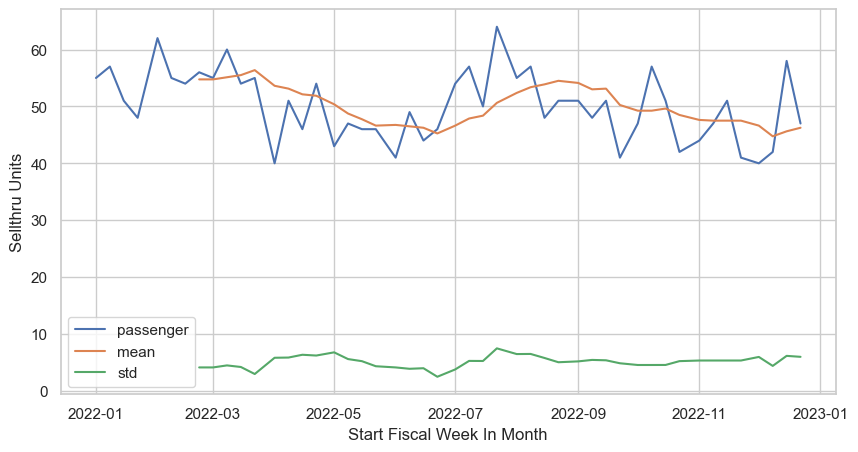

In [29]:
filtered_df_perEachWeek['rollmean']=filtered_df_perEachWeek['Sellthru Units'].rolling(window=8).mean()
filtered_df_perEachWeek['rollstd']=filtered_df_perEachWeek['Sellthru Units'].rolling(window=8).std()
plt.figure(figsize=(10,5))
sns.lineplot(data=filtered_df_perEachWeek, x=filtered_df_perEachWeek['Start Fiscal Week In Month'], y=filtered_df_perEachWeek['Sellthru Units'], label='passenger')
sns.lineplot(data=filtered_df_perEachWeek, x=filtered_df_perEachWeek['Start Fiscal Week In Month'], y=filtered_df_perEachWeek.rollmean, label='mean')
sns.lineplot(data=filtered_df_perEachWeek, x=filtered_df_perEachWeek['Start Fiscal Week In Month'], y=filtered_df_perEachWeek.rollstd, label='std')
plt.legend()
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller


### stationarity check

In [31]:
def checkStationarity(dataframe,features,index='Start Fiscal Week In Month', wind=4):
    
    dataframe[features+'mean']=dataframe[features].rolling(window=wind).mean()
    dataframe[features+'std']=dataframe[features].rolling(window=wind).std()
    adtest=adfuller(dataframe[features],autolag='AIC')
    stats =pd.Series(adtest[:4] ,index=['adf','pvalue','usedlag','no obs'])
    print(stats)
    for key,value in adtest[4].items():
        print('criticality',key,value)
    plt.figure(figsize=(10,5))
    sns.lineplot(data=dataframe, x=dataframe[index], y=dataframe[features], label=f'{features}')
    sns.lineplot(data=dataframe, x=dataframe[index], y=dataframe[(features+'mean')], label='mean')
    sns.lineplot(data=dataframe, x=dataframe[index], y=dataframe[(features+'std')], label='std')
    plt.legend()
    plt.show()

In [32]:
filtered_df_perEachWeek.columns

Index(['Start Fiscal Week In Month', 'Sellthru Units', 'ASP @ USD', 'rollmean',
       'rollstd'],
      dtype='object')

adf       -7.134659e+00
pvalue     3.445954e-10
usedlag    2.000000e+00
no obs     4.400000e+01
dtype: float64
criticality 1% -3.5885733964124715
criticality 5% -2.929885661157025
criticality 10% -2.6031845661157025


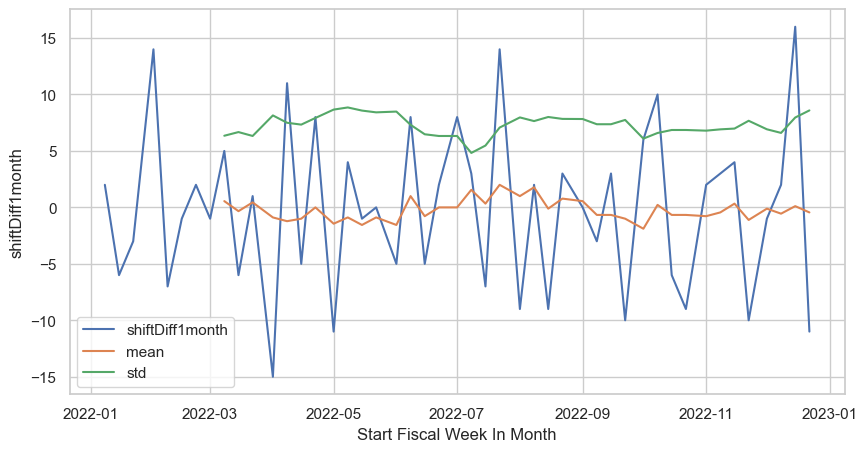

In [33]:
# shifting by one month
columns=['Start Fiscal Week In Month',
        'Sellthru Units','ASP @ USD',
        ]
x=1
shifting_1month=filtered_df_perEachWeek[columns]
shifting_1month['shift1month']=shifting_1month['Sellthru Units'].shift(x)
shifting_1month['shiftDiff1month']=shifting_1month['Sellthru Units']-shifting_1month['shift1month']

checkStationarity(shifting_1month[x:],'shiftDiff1month', wind=9)

adf        -4.915318
pvalue      0.000033
usedlag     0.000000
no obs     45.000000
dtype: float64
criticality 1% -3.584828853223594
criticality 5% -2.9282991495198907
criticality 10% -2.6023438271604937


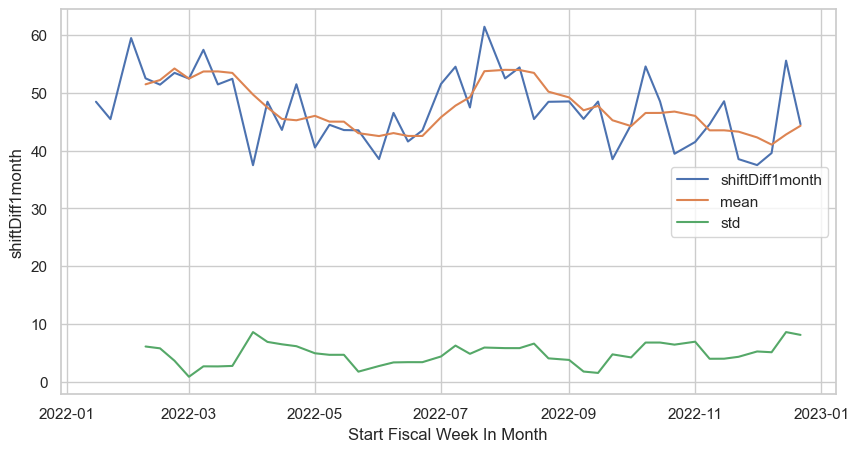

In [34]:
# smoothing by log2 then shifting and differenceing
columns=['Start Fiscal Week In Month',
        'Sellthru Units','ASP @ USD',
        ]
x=2
shifting_1month=filtered_df_perEachWeek[columns]
shifting_1month['log2smoothingVal']=np.log2(shifting_1month['Sellthru Units'])
shifting_1month['shift1month']=np.log2(shifting_1month['log2smoothingVal']).shift(x)

shifting_1month['shiftDiff1month']=shifting_1month['Sellthru Units']-shifting_1month['shift1month']

checkStationarity(shifting_1month[x:],'shiftDiff1month', wind=4)

adf        -5.097099
pvalue      0.000014
usedlag     0.000000
no obs     46.000000
dtype: float64
criticality 1% -3.5812576580093696
criticality 5% -2.9267849124681518
criticality 10% -2.6015409829867675


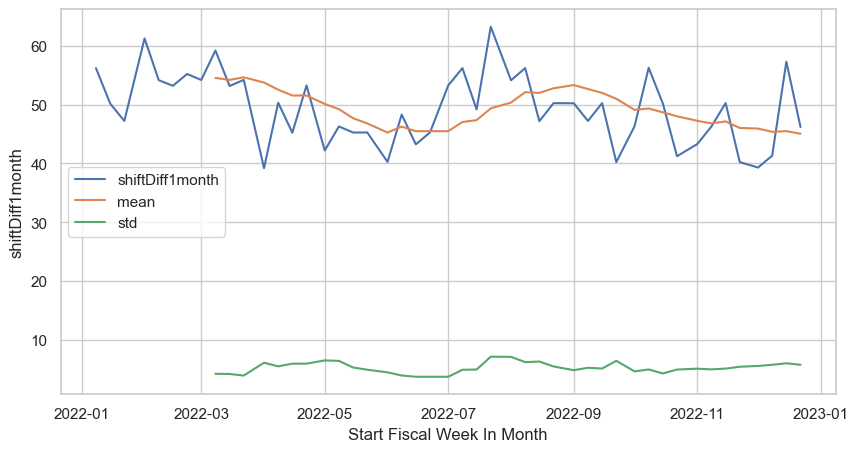

In [35]:
# smoothing by log19 then shifting and differenceing
columns=['Start Fiscal Week In Month',
        'Sellthru Units','ASP @ USD',
        ]
x=1
shifting_1month=filtered_df_perEachWeek[columns]
shifting_1month['log2smoothingVal']=np.log10(shifting_1month['Sellthru Units'])
shifting_1month['shift1month']=np.log2(shifting_1month['log2smoothingVal']).shift(x)

shifting_1month['shiftDiff1month']=shifting_1month['Sellthru Units']-shifting_1month['shift1month']

checkStationarity(shifting_1month[x:],'shiftDiff1month', wind=9)

In [36]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [59]:
data_f_model=filtered_df_perEachWeek[columns].copy(deep=True)
data_f_model['shift1month']=data_f_model['Sellthru Units'].diff(1)
data_f_model['shift2month']=data_f_model['Sellthru Units'].diff(2)
data_f_model['shift3month']=data_f_model['Sellthru Units'].diff(3)
data_f_model['shift4month']=data_f_model['Sellthru Units'].diff(4)

data_f_model['shift12month']=data_f_model['Sellthru Units'].diff(12)
data_f_model.set_index('Start Fiscal Week In Month',inplace=True)

adf       -7.765448e+00
pvalue     9.214360e-12
usedlag    1.000000e+00
no obs     4.200000e+01
dtype: float64
criticality 1% -3.596635636000432
criticality 5% -2.933297331821618
criticality 10% -2.6049909750566895


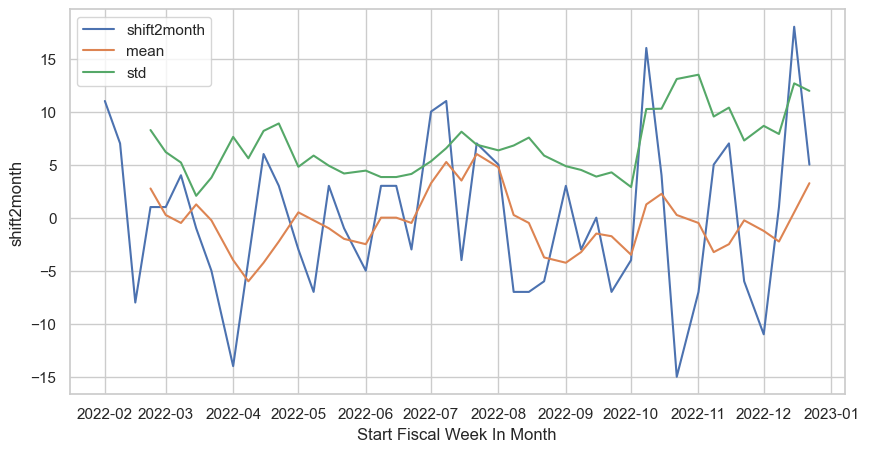

In [45]:
checkStationarity(dataframe=data_f_model[4:],features='shift2month')

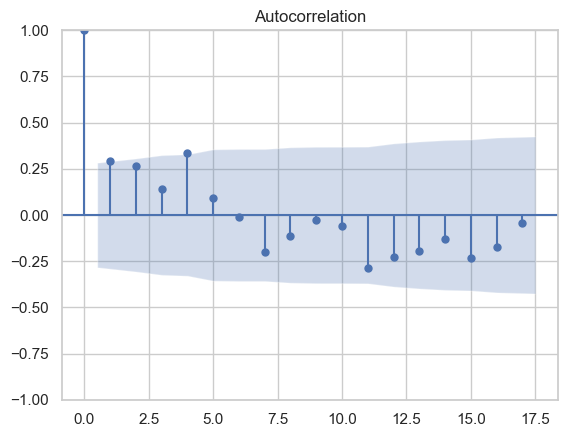

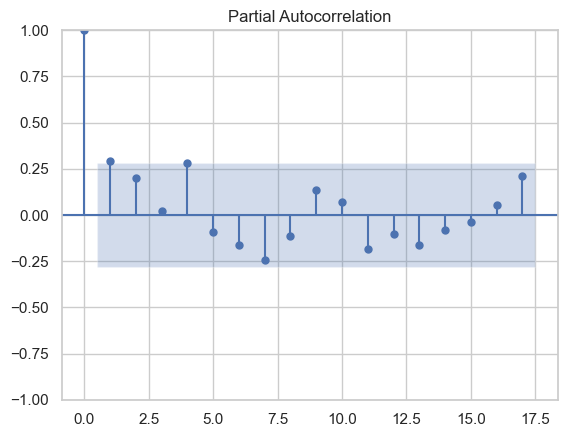

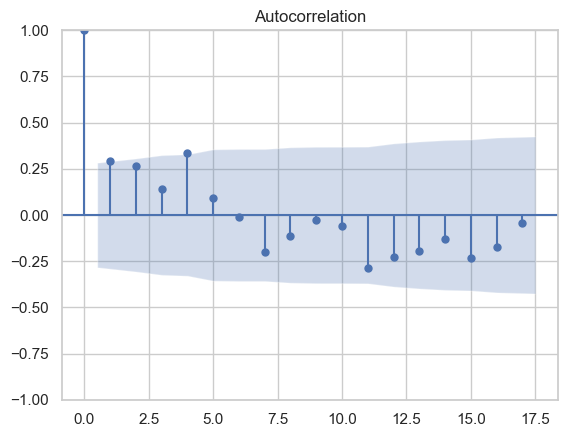

In [60]:
plot_pacf(data_f_model['Sellthru Units'].dropna(),lags=17)
plot_acf(data_f_model['Sellthru Units'].dropna(),lags=17)

In [61]:
# train test split

print('length of dataframe',len(data_f_model))
trainsplit=int(0.7*len(data_f_model))

train= data_f_model[:trainsplit]
test=data_f_model[trainsplit:]

length of dataframe 48


In [62]:
train.index = pd.DatetimeIndex(train.index).to_period('W')
test.index=pd.DatetimeIndex(test.index).to_period('W')

In [64]:
len(train),len(test)

(33, 15)

In [92]:

model=SARIMAX(train['Sellthru Units'],order=(5,1,1),seasonal_order=(5,1,1,8))
model_fit=model.fit()


C:\Users\adadi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
prediction_train_sarimax=model_fit.predict(start=train.index[0],end=train.index[-1])
prediction_test_sarimax=model_fit.predict(start=test.index[0],end=test.index[-1])

56.93633878247284


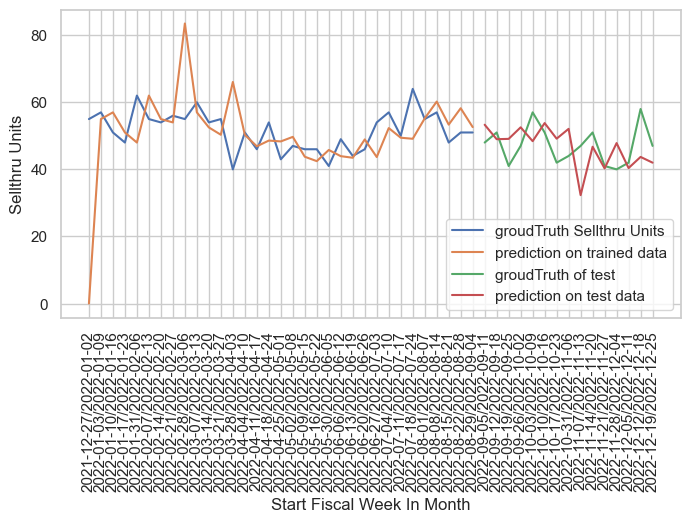

In [96]:
print(mean_squared_error(test['Sellthru Units'],prediction_test_sarimax[0:-1]))
plt.figure(figsize=(8,4))
sns.lineplot(data=train, x=train.index.astype(str), y='Sellthru Units', label='groudTruth Sellthru Units')
sns.lineplot(data=train, x=train.index.astype(str), y=prediction_train_sarimax , label='prediction on trained data')
sns.lineplot(data=test, x=test.index.astype(str), y='Sellthru Units', label='groudTruth of test')
sns.lineplot(data=test, x=test.index.astype(str), y=prediction_test_sarimax[0:-1],label='prediction on test data')
plt.xticks(rotation=90)
plt.show()


In [56]:
from sklearn.metrics import mean_squared_error